In [1]:
import warnings
warnings.filterwarnings('ignore')
import torch
dtype = torch.float
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
from torch.distributions import normal
import matplotlib.pyplot as plt, numpy as np, pickle
from scipy.stats import norm
from tifffile import imread
import sys
sys.path.append('../')
#from pn2v import *
from lib.gaussianMixtureNoiseModel import GaussianMixtureNoiseModel
from lib import histNoiseModel
from lib.utils import plotProbabilityDistribution
import os
import urllib
import zipfile
from pathlib import Path

In [2]:
dir = Path(r"E:\dl_monalisa\Data\Vim_fixed_mltplSNR_30nm\noise_models\old")
os.listdir(dir)

['GMM_Single_AvgGT_normalized.npz',
 'GMM_Single_AvgGT_normalized_2.npz',
 'GMM_Single_AvgGT_normalized_3.npz',
 'HistNoiseModel_Avg_calibration.npy',
 'HistNoiseModel_Avg_calibrationGMMNoiseModel_Avg_3_2_calibration.npz',
 'HistNoiseModel_Single_calibration.npy',
 'HistNoiseModel_Single_calibrationGMMNoiseModel_Single_3_2_calibration.npz',
 'HistNoiseModel_snr0_calibration.npy',
 'HistNoiseModel_snr0_calibrationGMMNoiseModel_snr0_3_2_calibration.npz',
 'HistNoiseModel_snr1_calibration.npy',
 'HistNoiseModel_snr1_calibrationGMMNoiseModel_snr1_3_2_calibration.npz',
 'HistNoiseModel_snr2_calibration.npy',
 'HistNoiseModel_snr2_calibrationGMMNoiseModel_snr2_3_2_calibration.npz',
 'HistNoiseModel_snr3_calibration.npy',
 'HistNoiseModel_snr3_calibrationGMMNoiseModel_snr3_3_2_calibration.npz',
 'Hist_Single_AvgGT_normalized.npy',
 'Hist_Single_AvgGT_normalized_2.npy',
 'Hist_Single_AvgGT_normalized_3.npy',
 'weird']

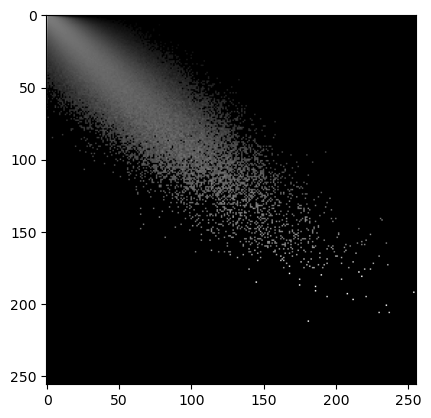

In [7]:
hist_name = "HistNoiseModel_Single_calibration.npy"
hist = np.load(dir / hist_name)
plt.figure()
plt.imshow(hist[0]**0.25,cmap='gray')

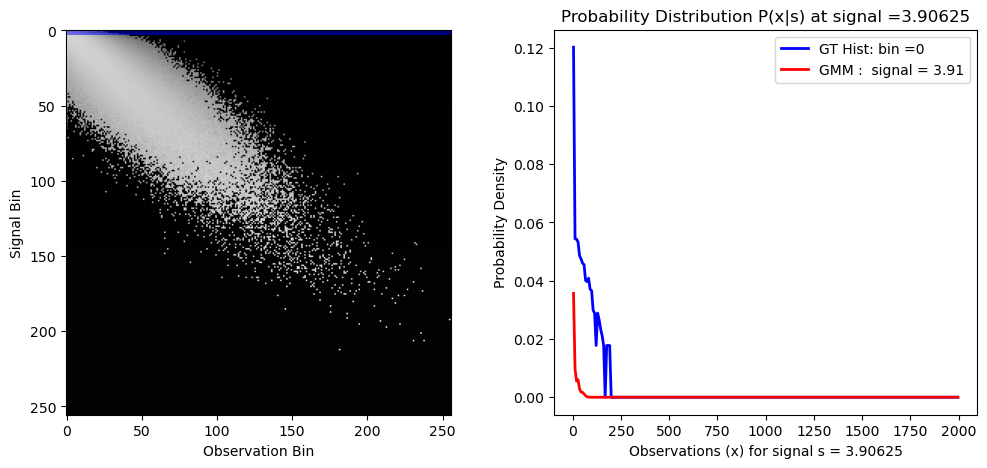

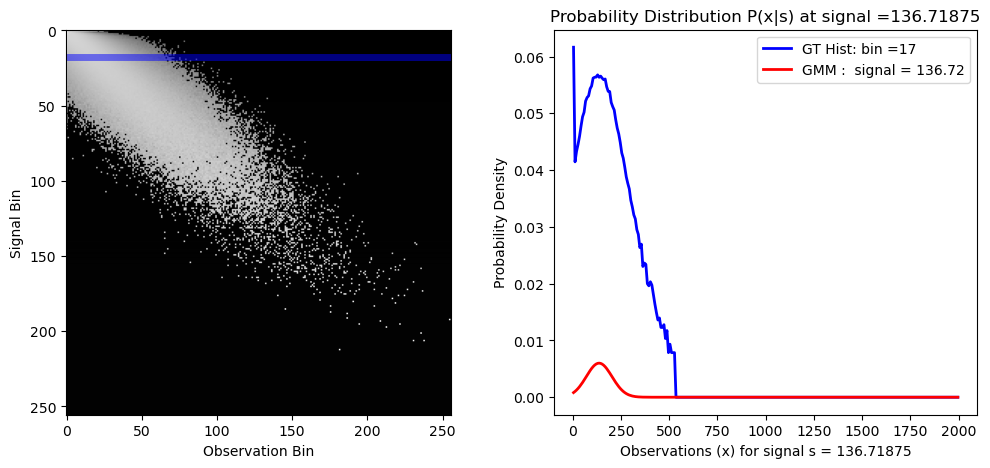

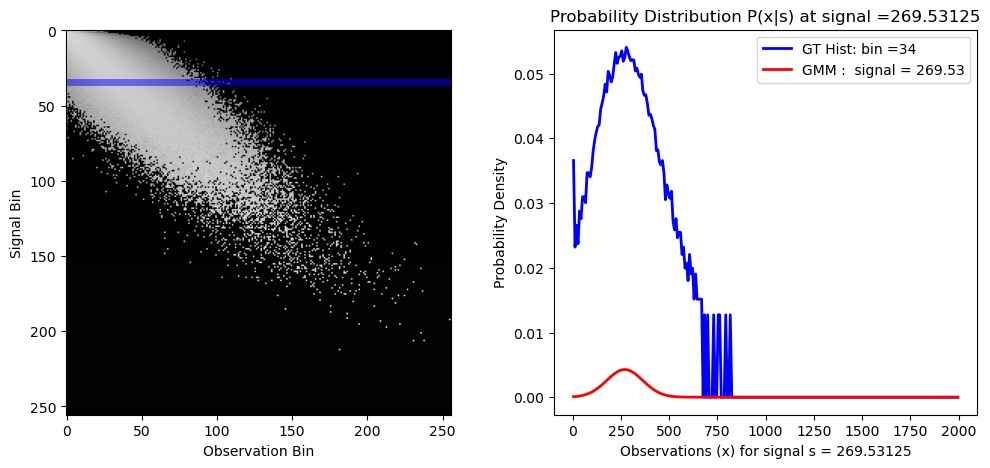

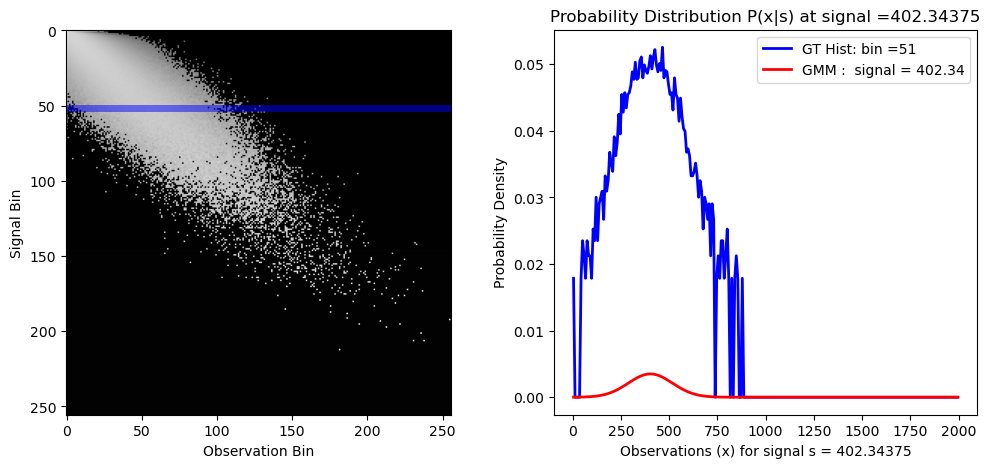

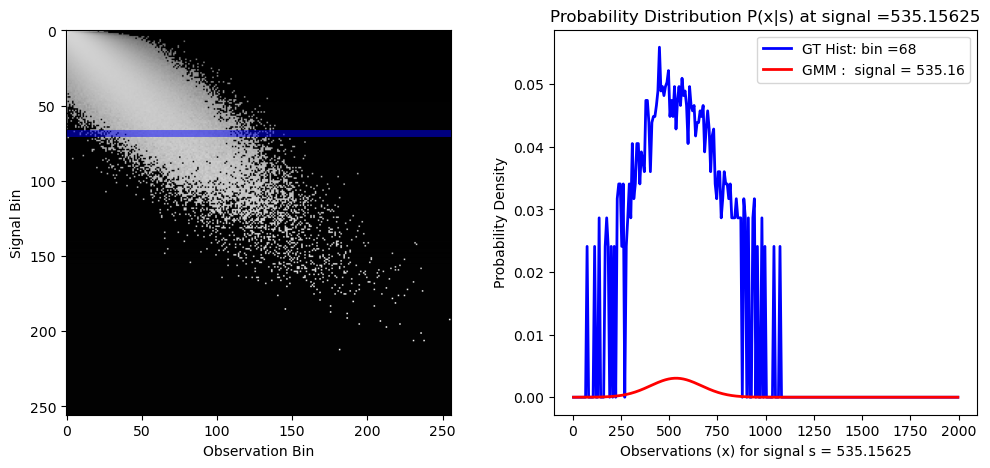

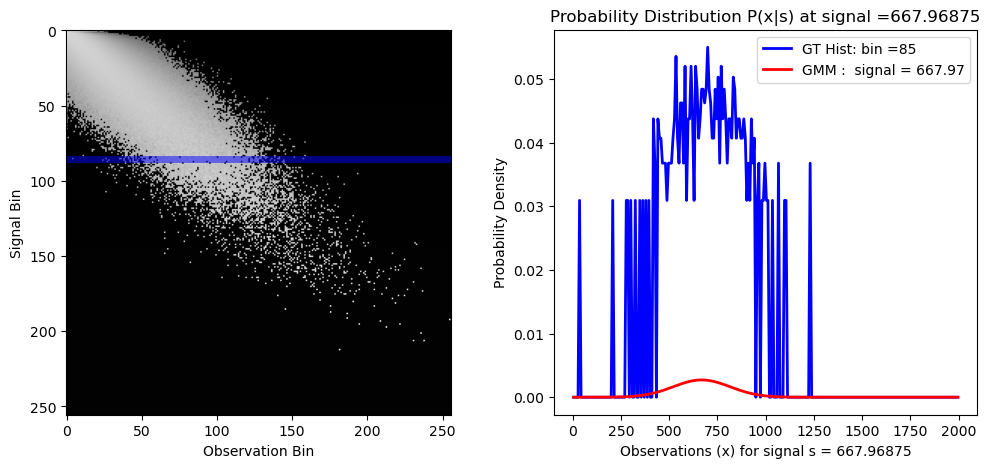

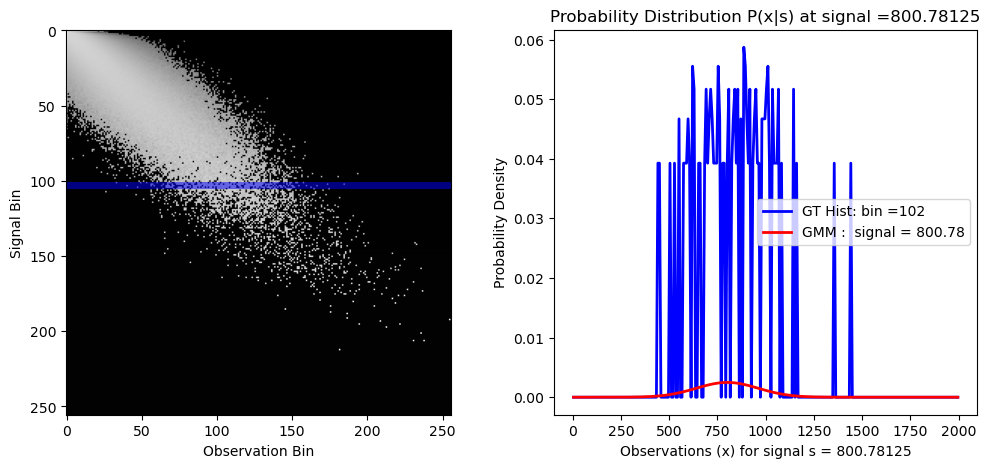

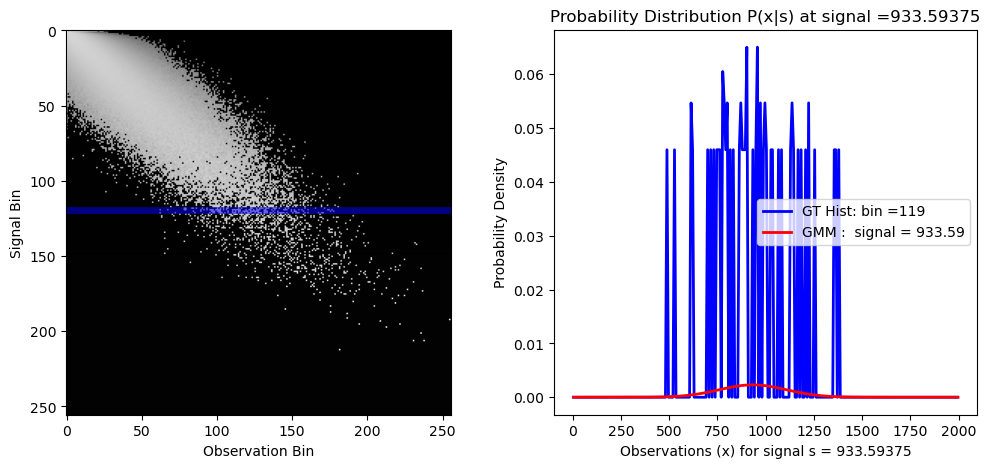

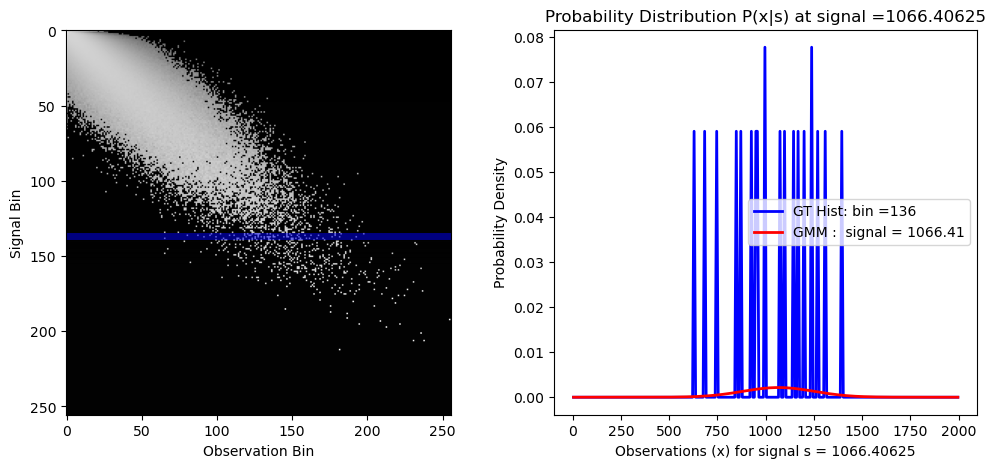

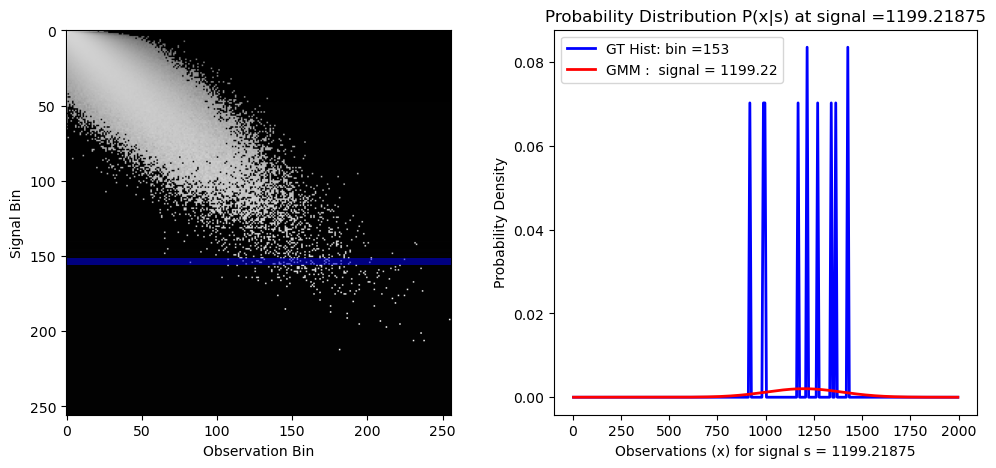

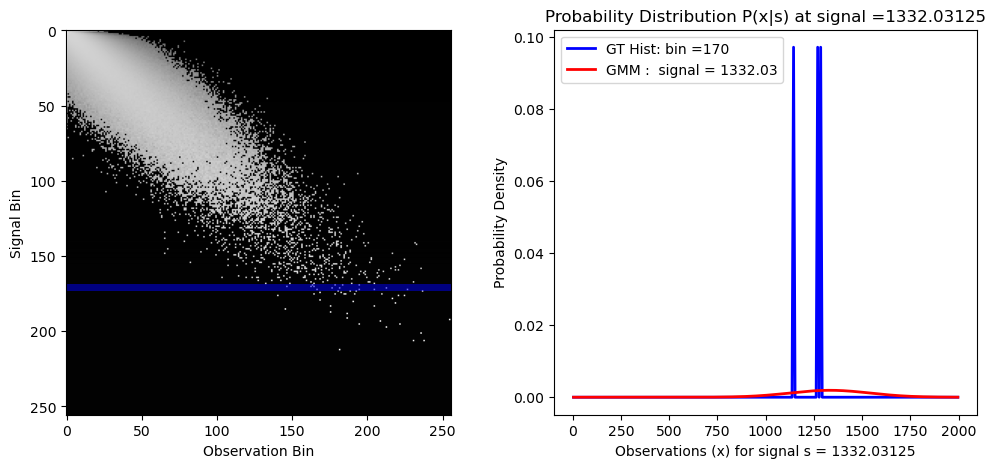

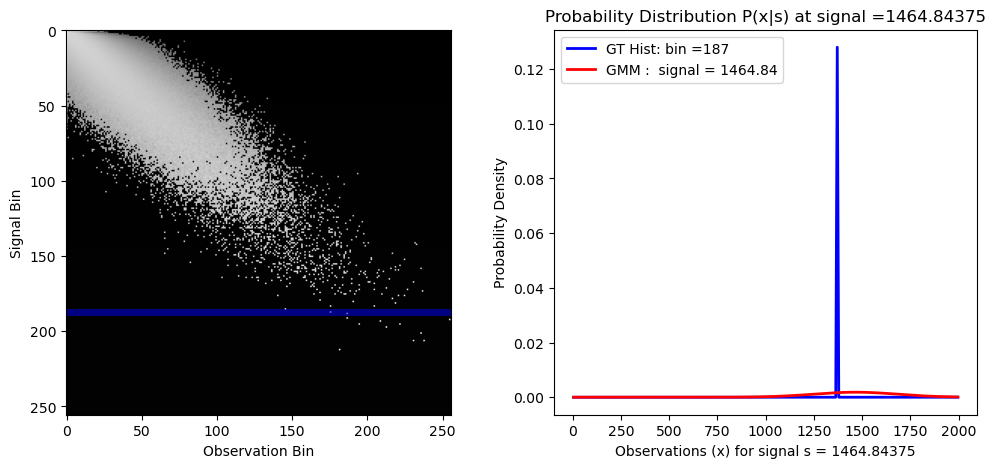

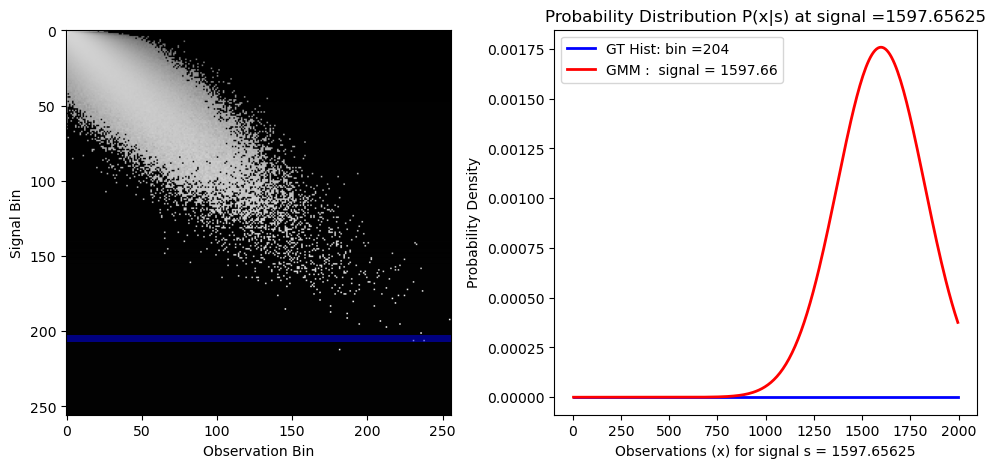

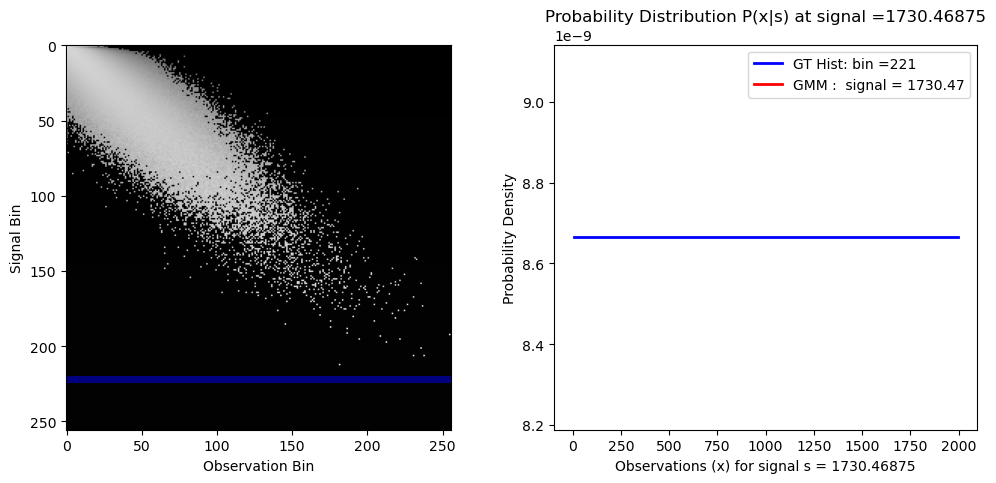

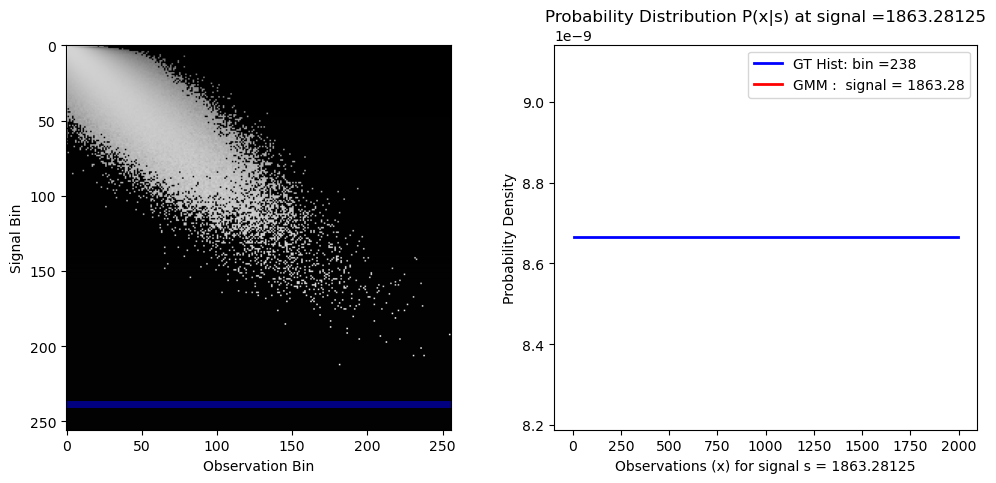

In [13]:
GMM_name = "HistNoiseModel_Single_calibrationGMMNoiseModel_Single_3_2_calibration.npz"
GMM_prm = np.load(dir / GMM_name)
GMM = GaussianMixtureNoiseModel(params = GMM_prm, device = device)
hist_bins = 256
minVal = 0  
maxVal = 2000

n_points = 15
signalBinIndex_list = (np.linspace(0,n_points-1,n_points)*hist_bins//n_points).astype(int)


for binidx in signalBinIndex_list:
    plotProbabilityDistribution(signalBinIndex=binidx, histogram=hist[0]**0.25, gaussianMixtureNoiseModel=GMM, min_signal=minVal, max_signal=maxVal, n_bin=hist_bins, device=device)

